# <b>plotly</b>

This section provides an overview to using `plotly` as the plotting `engine` with **fivecentplots**.  

One of the benefits of <b>fivecentplots</b> is the ability to utilize different plotting "engines" (i.e., libraries) with the same basic API.  This enables the user to choose the right library for the task: for example, `matplotlib` with its polished and extensive customization options for static images destined for a static powerpoint report, or `plotly` with its interactive live-view rendered within a Jupyter notebook to guide a deep-dive discussion of some technical issue.  In other words, <b>fivecentplots</b> seeks to be the Hannah Montana of python plotting to deliver "the Best of Both Worlds".

.. note:: Development of <b>fivecentplots</b> started with `matplotlib` and this engine is more mature than any other.  <b>Not all features/plot types are currently available in `plotly`, some simply because they have not yet been implemented and some because they simply are not possible in `plotly`</b>.  [<i>If something you need is missing, feel free to contribute a PR</i>]

## Setup

Import packages

In [1]:
%load_ext autoreload
%autoreload 2
import fivecentplots as fcp
import pandas as pd
from pathlib import Path
import imageio.v3 as imageio
fcp.set_theme('gray')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Previous theme file found! Renaming to "defaults_old.py" and copying theme "gray"...done!


## Setting the plotting engine

Switching from <b>fivecentplots</b>'s default plotting engine of `matplotlib` to `plotly` is easy and can be done for a single plot or globally for all plots.  

.. note:: For best results, it is also recommended to apply a modified theme file since some style settings do not map perfectly between `matplotlib` and `plotly`

1. <b>Per plot basis</b>: to apply the `plotly` engine to a single plot, provide the keyword `engine` and (optionally) `theme` to the plot call


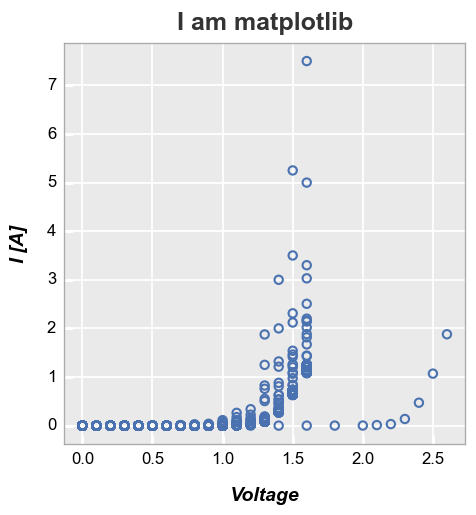

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
fcp.plot(df, x='Voltage', y='I [A]', lines=False, ws_fig_ax=0, ax_size=[400, 400], title='I am matplotlib')

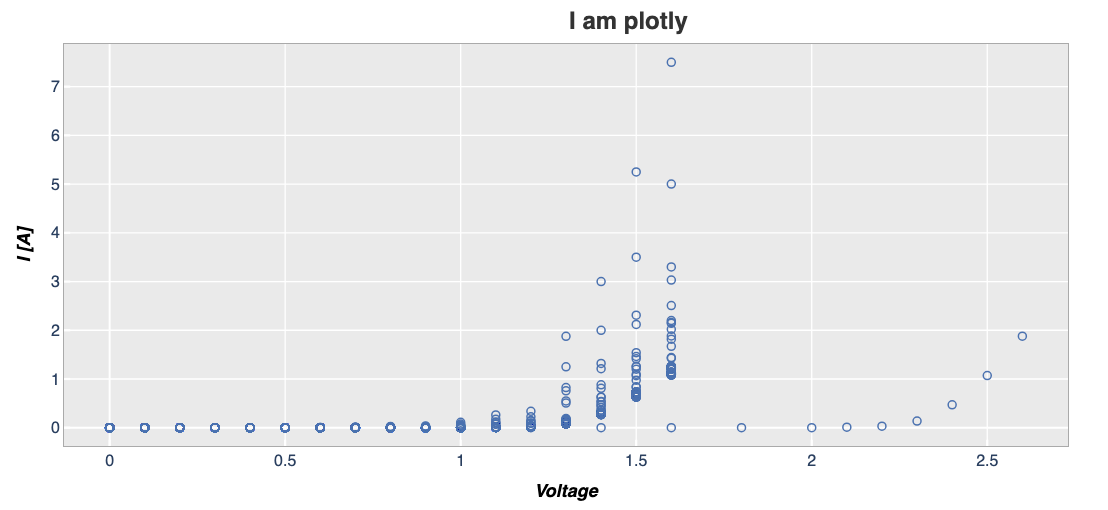

In [6]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
fcp.plot(df, x='Voltage', y='I [A]', lines=False, ws_fig_ax=0, ax_size=[400, 400], title='I am plotly', engine='plotly', theme='gray_plotly')

2. <b>Global</b>: to set a different plotting engine for your current workspace and have it apply to all plotting calls automatically, set the engine in <b>fivecentplots</b> global keyword dictionary (you can do this with any `plotly` keyword as well, like setting the modebar visibility)

In [2]:
fcp.KWARGS['engine'] = 'plotly'
fcp.set_theme('gray_plotly')

Previous theme file found! Renaming to "defaults_old.py" and copying theme "gray_plotly"...done!


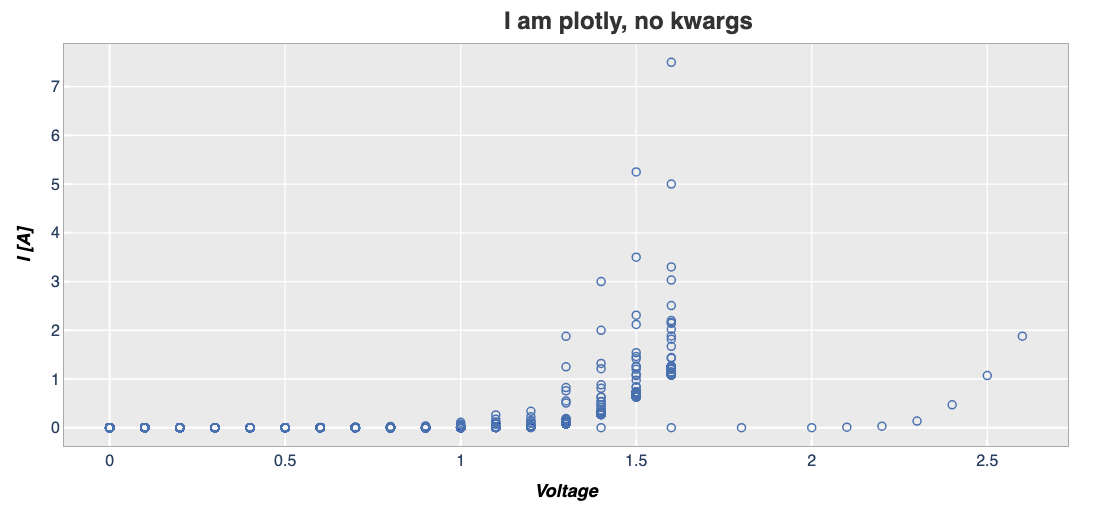

In [8]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
fcp.plot(df, x='Voltage', y='I [A]', lines=False, ws_fig_ax=0, ax_size=[400, 400], title='I am plotly, no kwargs')

.. note::  <b>fivecentplots</b> will attempt to detect if you are using `plotly` within a Jupyter notebook.  If so, it will automatically connect to `plotly`'s notebook mode via `plotly.offline.init_notebook_mode(connected=True)`.  Be aware that you may experience some lag after executing your first plot call while this function runs.

## XY Plots

Load a `pd.DataFrame` containg some make-believe current vs voltage data for a set of diodes:

In [3]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
df.head(10)

Substrate  Target Wavelength  Boost Level  Temperature [C]    Die  Voltage  \
0        Si                450          0.2               25  (1,1)      0.0   
1        Si                450          0.2               25  (1,1)      0.1   
2        Si                450          0.2               25  (1,1)      0.2   
3        Si                450          0.2               25  (1,1)      0.3   
4        Si                450          0.2               25  (1,1)      0.4   
5        Si                450          0.2               25  (1,1)      0.5   
6        Si                450          0.2               25  (1,1)      0.6   
7        Si                450          0.2               25  (1,1)      0.7   
8        Si                450          0.2               25  (1,1)      0.8   
9        Si                450          0.2               25  (1,1)      0.9   

   I Set  I [A]  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0  
5    0.0    0.0  
6    0.0    0.0  
7    0.0    0.0  
8    0.0    0.0  
9    0.0    0.0

### Scatter

A simple XY scatter plot of current vs voltage is shown below.  If you hover over the plot, you'll see `plotly`'s interactive modebar which will allow you to scroll, zoom, etc.

In [4]:
fcp.plot(df, x='Voltage', y='I [A]', lines=False, ax_size=[400, 400], title='IV Data')

### Legend

Using the <a href="plot.html#Legend">identical function call</a> we used for `matplotlib` with data filtering and a specfied `legend` keyword, we can achieve a very similar result in `plotly`.  However, with `plotly`'s interactivity, we have new options available to us such as clicking on a legend label to disable the associated curve:

In [13]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

[88.625, 86.25]
86.625


### Axes scales

Non-linear axes scales are available with the `plotly` engine, here showing a <i>log-log</i> representation of the above plot with minor gridlines enabled:

In [14]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', xmin=0.9, xmax=2.1, grid_minor=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

[88.625, 86.25]
86.625


### Categorical labels

Categorical DataFrame columns can also be plotted on x and/or y axes.  In this example, we take the current values for each of the 3 diodes above at a voltage of 1.5V (using ``filter``) and plot the die location coordinates on the x-axis:

In [16]:
fcp.plot(df, x='Die', y='I [A]',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Voltage==1.5')

### Time series

In [18]:
ts = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_ts.csv')
ts.head()

Date  Happiness Quotient
0  1/1/2015           16.088954
1  1/2/2015           18.186724
2  1/3/2015           35.744313
3  1/4/2015           38.134045
4  1/5/2015           46.147279

We can also use ``plot`` to visualize time series data.  In this example, we use the ``ts`` dataset loaded previously and place the "Date" column on the x-axis.  For clarity, we disable markers and widen the horizontal size of the plot area.

In [19]:
fcp.plot(ts, x='Date', y='Happiness Quotient', markers=False, ax_size=[1000, 250], line_width=2)

### Secondary axes

Secondary x- and y-axes can be added to an xy plot using the ``twin_[x|y]`` keyword.  We must also provide an additional DataFrame column name for the alternate axes to the kwarg for the axis that is not twinned (i.e., `twin_x` means two column names are required for `y` and `twin_y` means two column names are required for `x`). Lines and markers will be colored to match the axis label.  Grid lines default to the primary axis but secondary gridlines can also be enabled as shown below.

<div class="admonition note">
<p class="admonition-title"></p>
<p>Note: kwargs related to the primary axes are suffixed with `_x` or `_y`.  Keywords related to the secondary axis are suffixed with `_x2` and `_y2`.</p>
</div>

#### Shared x-axis (twin_x)

In [23]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

.. caution:: The above plot illustrates that there are some limits on the ability to match results exactly when interchanging plotting engines.  With `matplotlib`, <b>fivecentplots</b> rotates the secondary y-axis title to 270° but `plotly` does not support rotation of axis titles.

Next, the same plot but with a legend enabled.  Note that the legend will describe the value from the ``legend`` column and the value associated with the curve (either the primary or the secondary axis):

In [24]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die', legend_edge_width=1, legend_edge_color='#000000',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

[165.125, 70.0]
163.125


Next, the same plot but with secondary gridlines enabled:

In [41]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         grid_major_y2=True, grid_major_y2_style='--',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

[165.125, 70.0]
163.125


#### Shared y-axis (twin_y)

Secondary x-axes with a shared y-axis are not supported by plotly

### Multiple x & y values

Instead of sharing (or twinning) one <i>independent</i> axis across a primary and secondary <i>dependent</i> axis, we can plot multiple columns of data on the same dependent axis.  In this case, all dependent values share the same limits on the plot.

#### Multiple y only

If we supply a list of column names for keyword ``y``, we can plot both response values on the same axis.  The y-axis label is automatically updated to list all column names in use (this can be overridden using keyword ``label_y``).  Legend values are automatically updated to designate which response column applies to each curve.

In [85]:
fcp.plot(df, x='Voltage', y=['Boost Level', 'I [A]'], legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

[183.125, 166.0]
181.125


PlotlyKeyError: Invalid property specified for object of type plotly.graph_objs.Layout: 'yaxis2'

Did you mean "yaxis"?

    Valid properties:
        activeselection
            :class:`plotly.graph_objects.layout.Activeselection`
            instance or dict with compatible properties
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        barcornerradius
            Sets the rounding of bar corners. May be an integer
            number of pixels, or a percentage of bar width (as a
            string ending in %).
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to reduce
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to reduce "opacity" to
            see multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        hoversubplots
            Determines expansion of hover effects to other subplots
            If "single" just the axis pair of the primary point is
            included without overlaying subplots. If "overlaying"
            all subplots using the main axis and occupying the same
            space are included. If "axis", also include stacked
            subplots using the same axis when `hovermode` is set to
            "x", *x unified*, "y" or *y unified*.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        map
            :class:`plotly.graph_objects.layout.Map` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        minreducedheight
            Minimum height of the plot with margin.automargin
            applied (in px)
        minreducedwidth
            Minimum width of the plot with margin.automargin
            applied (in px)
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newselection
            :class:`plotly.graph_objects.layout.Newselection`
            instance or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scattergap
            Sets the gap (in plot fraction) between scatter points
            of adjacent location coordinates. Defaults to `bargap`.
        scattermode
            Determines how scatter points at the same location
            coordinate are displayed on the graph. With "group",
            the scatter points are plotted next to one another
            centered around the shared location. With "overlay",
            the scatter points are plotted over one another, you
            might need to reduce "opacity" to see multiple scatter
            points.
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        selections
            A tuple of
            :class:`plotly.graph_objects.layout.Selection`
            instances or dicts with compatible properties
        selectiondefaults
            When used in a template (as
            layout.template.layout.selectiondefaults), sets the
            default property values to use for elements of
            layout.selections
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to reduce "opacity" to see
            multiple bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "yaxis"?


And with a custom `label_y`:

In [25]:
fcp.plot(df, x='Voltage', y=['Boost Level', 'I [A]'], legend='Die', label_y='Data',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

#### Multiple x only

We can do the same thing with the x-axis:

In [26]:
fcp.plot(df, x=['Boost Level', 'I [A]'], y='Voltage', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Grouping

As explained in <a href='grouping.html'>Grouping data</a>, we can group xy plots based on other DataFrame columns to better visualize a dataset.  Grouping options include:

* ``row``: a single column of subplots
* ``column``: a single row of subplots
* ``row`` x ``column``: a 2D grid of subplots based on two different DataFrame columns
* ``wrap``: a 2D grid of subplots wrapped in sequence (based on one or more DataFrame columns)

These grouped plots share a legend (if enabled) and will share common ranges unless sharing is explicity disabled

#### Row plot

Row plots create multiple subplots in a single column.  Each unique value in the DataFrame column provided for keyword ``row`` creates a new row in the subplot grid.  Plot order is defined alphabetically from top to bottom.  Each row contains a row label indicating the unique value of the ``row`` column.  

In [28]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', row='Boost Level', ax_size=[225, 225],
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

AttributeError: 'DF_Element' object has no attribute 'names'

#### Column plot

Column plots create multiple subplots in a single row.  Each unique value in the DataFrame column provided for keyword ``col`` creates a new column in the subplot grid.  Plot order is defined alphabetically from left to right.  Each column contains a column label indicating the unique value of the ``col`` column.  

In [29]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', ax_size=[225, 225],
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

AttributeError: 'DF_Element' object has no attribute 'names'

#### Row x column grid

If we provide DataFrame column names for both ``row`` and ``col`` keywords, we create a grid of subplots where each combination of unique values is used to make a subplot.

In [30]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]',
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=13)

AttributeError: 'DF_Element' object has no attribute 'names'

#### Wrap plot

A wrap plot is an alternate view of the row by column grid.  For wrap plots, each subplot contains the unique values or combination of values from one or more DataFrame columns.  The actual values plotted are condensed into a single label above each plot window.  By default, spacing between plots is removed, unlike the row x column grouping option (this default can be overriden by keyword ``ws_col``).  Additionally, the default number of columns in this grid are determined by the square root of the total number of subplot windows.  However, the number of columns in a wrap plot can be controlled via keyword ``ncol``.  In wrap plots, x and y axes ranges must be shared.

Default number of columns:

In [32]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'],
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=13)

AttributeError: 'DF_Element' object has no attribute 'edge_width_adj'

### Other options

Several additional options available to enhance data analysis in xy plots are describe below.  

#### Horizontal & vertical lines

We can add horizontal and vertical reference lines to a plot using one or more of the following keywords: `ax_hlines`, `ax_vlines`, `ax2_hlines`, `ax2_vlines` where "h" stands for "horizontal", "v" stands for "vertical", "ax" stands for primary axes, and "ax2" stands for secondary axes (if they exists).  The keywords except several different types of inputs:

* a single float number

* a list of float numbers

* or a variable-length list of tuples (only first value is required):
    
    * item 1 (required) = x or y axis value of the line or the name of a DataFrame column from which the first entry in the column will be used
    
    * item 2: line color
    
    * item 3: line style
    
    * item 4: line width
    
    * item 5: line alpha
    
    * item 6: legend text (added automatically is using a DataFrame column name for the value)
    

First we add a single horizontal and vertical line using default styles (determined by the current theme):

Next we plot multiple horizontal and vertical lines at the same time and use the tuple formulation to style them independently (note one line contains the tuple value for legend name and thus is shown in the legend):

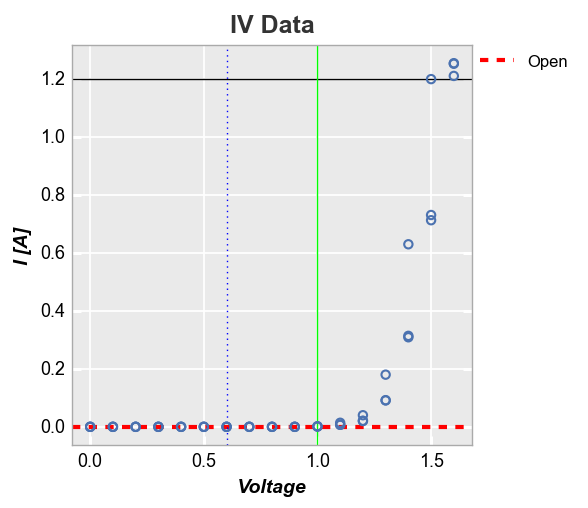

In [26]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, legend=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ax_hlines=[(0, '#FF0000', '--', 3, 1, 'Open', '#555555', 0.25), 1.2],
         ax_vlines=[(0.6, '#0000ff', ':'), (1, '#00FF00')])

For row/col/wrap plots, we can also apply the keyword `ax_[h|v]lines_by_plot=True` to pass a different value to each subplot:

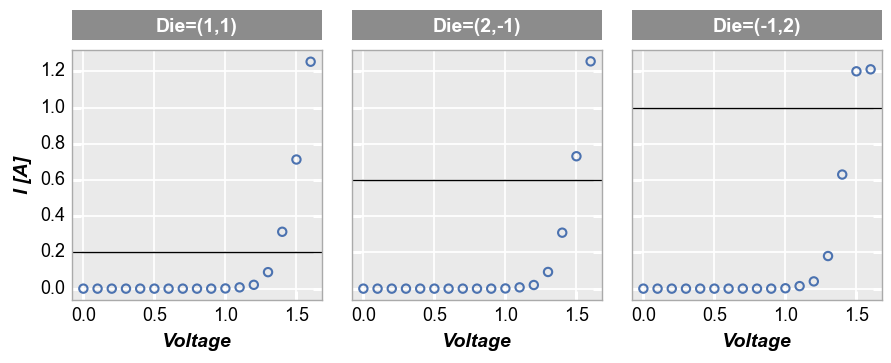

In [28]:
fcp.plot(df, x='Voltage', y='I [A]', col='Die', lines=False, legend=True, ax_size=[250, 250],
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ax_hlines=[0.2, 0.6, 1.0], ax_hlines_by_plot=True)

#### Curve fitting

Since this fit is garbage, let's make it a polynomial of degree 5.  We'll also disable the legend just because:

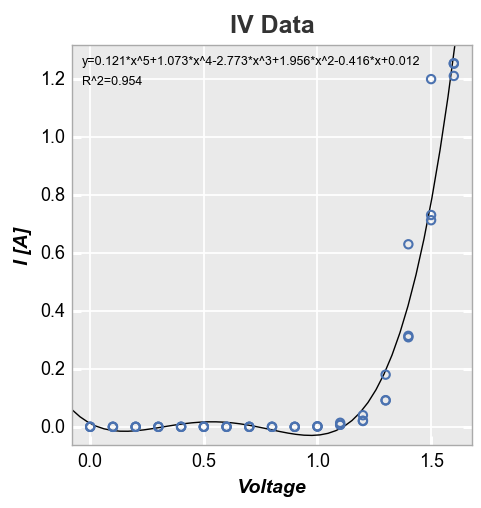

In [30]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, legend=False,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fit=5, fit_eqn=True, fit_rsq=True, fit_font_size=9)

#### Confidence intervals

<b>fivecentplots</b> can display confidence intervals around a data set.  Three different methods are available to calculate these intervals:

* ``conf_int``: upper and lower bounds based on a single confidence value between 0-1 (typical = 0.95)
* ``perc_int``: upper and lower bounds based on percentiles between 0-1
* ``nq_int``: upper and lower bounds based on values of sigma (where the mean of a distribution is sigma=0)

By default these intervals are shown as partially transparent filled regions around a curve.  These intervals are calculated point-by-point so they are different than confidence bands that are computed from a regression.  These intervals are useful mainly for datasets where multiple points exist at each x-value.

To demonstrate this feature we will use a special dataset:

In [40]:
df_interval = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_interval.csv')
df_interval.head()

x          y
0 -1.0 -10.715459
1 -1.0  -9.972410
2 -1.0 -30.740532
3 -1.0 -31.368963
4 -1.0 -29.058633

First we show the 95% confidence interval:

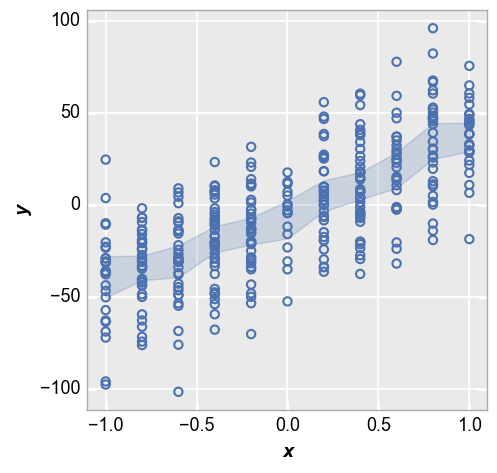

In [41]:
fcp.plot(df_interval, x='x', y='y', lines=False, conf_int=0.95)

#### Control limits

<b>fivecentplots</b> can display upper and lower control limts for a plot via keywords ``ucl`` and ``lcl`` respectively.  This is a convenient way to show what a target values or target ranges for a dataset.

First we show an example with an upper control limit only.  Notice the region outside of the upper limit is shaded to show data points that fail to meet this target.

Now consider the case where we have both an upper and a lower control limit.  Again, notice that the ranges outside of the limits are shaded.  We will also enable a legend to make the meaning of the shaded region obvious.

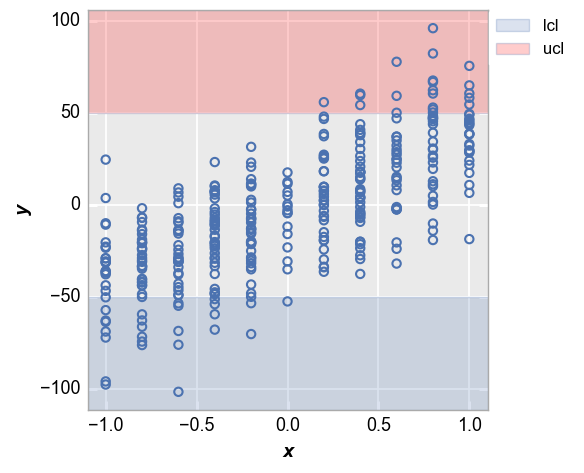

In [46]:
fcp.plot(df_interval, x='x', y='y', lines=False, ucl=50, lcl=-50, ucl_fill_color='#FF0000', legend=True)

We can invert the shading behavior to show points that fall within our target range using the keyword `control_limit_side="inside"` ("outside" is used by default).  If both ucl and lcl are defined, use kwargs for lcl to style the shaded region):

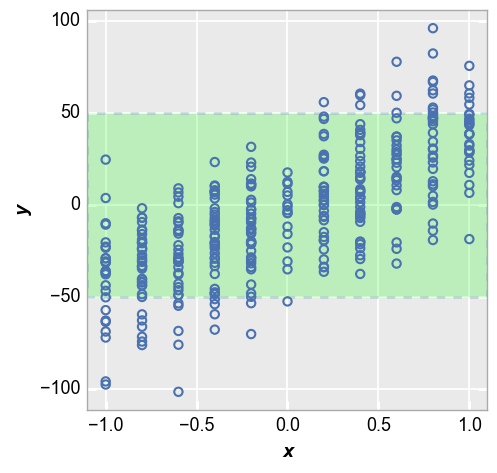

In [47]:
fcp.plot(df_interval, x='x', y='y', lines=False, ucl=50, lcl=-50,
         control_limit_side='inside', lcl_fill_color='#00FF00', lcl_edge_width=2, lcl_edge_style='--')

#### Reference line

We can add an arbitrary reference line to the plot using the keyword `ref_line`.  The value of this keyword is: (1) the name of one or more columns in the `DataFrame`; or (2) a pandas `Series` with the same number of rows as the `x` column.  These data will be plotted against the values for `x` so there must be a matching number of rows.

We can also add multiple reference lines to a single plot:

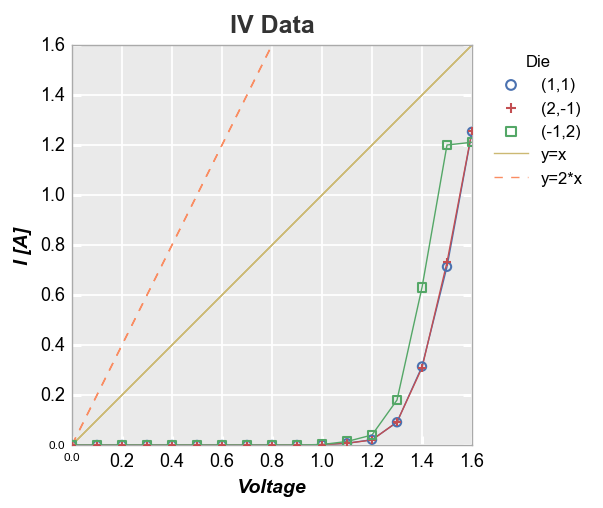

In [49]:
df['2*Voltage'] = 2*df['Voltage']
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         xmin=0, ymin=0, xmax=1.6, ymax=1.6,
         ref_line=['Voltage', '2*Voltage'], ref_line_legend_text=['y=x', 'y=2*x'],
         ref_line_style=['-', '--'], ref_line_color=[5,6])

## imshow

In [5]:
img_rgb = imageio.imread(Path(fcp.__file__).parent / 'test_data/imshow_cat_pirate.png')

In [ ]:
%%time
img_raw = fcp.utilities.img_grayscale(img_rgb, as_df=True)
fcp.imshow(img_raw*1.1)

In [ ]:
%%time
fcp.imshow(img_rgb)

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [14]:
px.imshow_utils.rescale_intensity

<function plotly.express.imshow_utils.rescale_intensity(image, in_range='image', out_range='dtype')>

In [ ]:
%%time
fig = px.imshow(img_rgb)
fig.show()

In [ ]:
%%time
fig = px.imshow(img_raw.to_numpy())
fig.show()

In [89]:
%%time
fig = make_subplots(rows=1, cols=1)
ii = [go.Image(z=img_rgb)]
fig.add_trace(ii[0], row=1, col=1)
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Image: 'binary'

Did you mean "name"?

    Valid properties:
        colormodel
            Color model used to map the numerical color components
            described in `z` into colors. If `source` is specified,
            this attribute will be set to `rgba256` otherwise it
            defaults to `rgb`.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Set the pixel's horizontal size.
        dy
            Set the pixel's vertical size
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.image.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `z`, `color` and `colormodel`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgrouptitle
            :class:`plotly.graph_objects.image.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        source
            Specifies the data URI of the image to be visualized.
            The URI consists of "data:image/[<media
            subtype>][;base64],<data>"
        stream
            :class:`plotly.graph_objects.image.Stream` instance or
            dict with compatible properties
        text
            Sets the text elements associated with each z value.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x0
            Set the image's x position. The left edge of the image
            (or the right edge if the x axis is reversed or dx is
            negative) will be found at xmin=x0-dx/2
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        y0
            Set the image's y position. The top edge of the image
            (or the bottom edge if the y axis is NOT reversed or if
            dy is negative) will be found at ymin=y0-dy/2. By
            default when an image trace is included, the y axis
            will be reversed so that the image is right-side-up,
            but you can disable this by setting
            yaxis.autorange=true or by providing an explicit y axis
            range.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        z
            A 2-dimensional array in which each element is an array
            of 3 or 4 numbers representing a color.
        zmax
            Array defining the higher bound for each color
            component. Note that the default value will depend on
            the colormodel. For the `rgb` colormodel, it is [255,
            255, 255]. For the `rgba` colormodel, it is [255, 255,
            255, 1]. For the `rgba256` colormodel, it is [255, 255,
            255, 255]. For the `hsl` colormodel, it is [360, 100,
            100]. For the `hsla` colormodel, it is [360, 100, 100,
            1].
        zmin
            Array defining the lower bound for each color
            component. Note that the default value will depend on
            the colormodel. For the `rgb` colormodel, it is [0, 0,
            0]. For the `rgba` colormodel, it is [0, 0, 0, 0]. For
            the `rgba256` colormodel, it is [0, 0, 0, 0]. For the
            `hsl` colormodel, it is [0, 0, 0]. For the `hsla`
            colormodel, it is [0, 0, 0, 0].
        zsmooth
            Picks a smoothing algorithm used to smooth `z` data.
            This only applies for image traces that use the
            `source` attribute.
        zsrc
            Sets the source reference on Chart Studio Cloud for
            `z`.
        
Did you mean "name"?

Bad property path:
binary_string
^^^^^^

In [98]:
%%time
fig = go.Figure()
fig.add_trace(go.Image(z=img_rgb))
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Modebar: 'display'

Did you mean "addsrc"?

    Valid properties:
        activecolor
            Sets the color of the active or hovered on icons in the
            modebar.
        add
            Determines which predefined modebar buttons to add.
            Please note that these buttons will only be shown if
            they are compatible with all trace types used in a
            graph. Similar to `config.modeBarButtonsToAdd` option.
            This may include "v1hovermode", "hoverclosest",
            "hovercompare", "togglehover", "togglespikelines",
            "drawline", "drawopenpath", "drawclosedpath",
            "drawcircle", "drawrect", "eraseshape".
        addsrc
            Sets the source reference on Chart Studio Cloud for
            `add`.
        bgcolor
            Sets the background color of the modebar.
        color
            Sets the color of the icons in the modebar.
        orientation
            Sets the orientation of the modebar.
        remove
            Determines which predefined modebar buttons to remove.
            Similar to `config.modeBarButtonsToRemove` option. This
            may include "autoScale2d", "autoscale",
            "editInChartStudio", "editinchartstudio",
            "hoverCompareCartesian", "hovercompare", "lasso",
            "lasso2d", "orbitRotation", "orbitrotation", "pan",
            "pan2d", "pan3d", "reset", "resetCameraDefault3d",
            "resetCameraLastSave3d", "resetGeo",
            "resetSankeyGroup", "resetScale2d", "resetViewMapbox",
            "resetViews", "resetcameradefault",
            "resetcameralastsave", "resetsankeygroup",
            "resetscale", "resetview", "resetviews", "select",
            "select2d", "sendDataToCloud", "senddatatocloud",
            "tableRotation", "tablerotation", "toImage",
            "toggleHover", "toggleSpikelines", "togglehover",
            "togglespikelines", "toimage", "zoom", "zoom2d",
            "zoom3d", "zoomIn2d", "zoomInGeo", "zoomInMapbox",
            "zoomOut2d", "zoomOutGeo", "zoomOutMapbox", "zoomin",
            "zoomout".
        removesrc
            Sets the source reference on Chart Studio Cloud for
            `remove`.
        uirevision
            Controls persistence of user-driven changes related to
            the modebar, including `hovermode`, `dragmode`, and
            `showspikes` at both the root level and inside
            subplots. Defaults to `layout.uirevision`.
        
Did you mean "addsrc"?

Bad property path:
display
^^^^^^^

In [25]:
img_raw = fcp.utilities.img_grayscale(img_rgb)

In [96]:
%%time
fig = make_subplots(rows=1, cols=1)
ii = [go.Image(z=img_raw)]
fig.add_trace(ii[0], row=1, col=1)
fig.show()

## Modebar